In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from sklearn.feature_selection import mutual_info_regression as mi_reg

aedc = pd.read_csv('./wrangled/AEDC.csv', index_col = 'LGA')
tsdr = pd.read_csv('./wrangled/tsdr.csv', index_col = 0)
vcams = pd.read_csv('./wrangled/vcams.csv', index_col = 'LGA')
depression = pd.read_csv('./wrangled/depression.csv', index_col = 'LGA')
tsratio = pd.read_csv('./wrangled/tsRatio.csv', index_col = 0)

def vcamsLGA(factor, year, sheet = 0):
    path = './raw_data/VCAMS_'+factor+'.xlsx'
    df = pd.read_excel(path, sheet_name=sheet)
    # remove unnamed rows
    df = df.loc[:, ~df.columns.str.match('Unnamed')]
    # remove aggregates (victoria)
    df = df[~df['LGA'].str.contains('Victoria')]
    df = df[df['Year'] == year]
    df['LGA'] = df['LGA'].replace('\([a-zA-Z]*\)','', regex = True)
    df['LGA'] = df['LGA'].str.strip()
    df = df.set_index('LGA')
    df.loc[df['Indicator'] == 'NDP'] = np.nan
    df['Indicator'] = pd.to_numeric(df['Indicator'])
    df = df.drop(['Numerator', 'Denominator', 'Year'], axis =1).rename({'Indicator': factor}, axis = 1)
    return df

def vcamsDHS(name, year, sheet = 0):
    path = './raw_data/VCAMS_'+name+'.xlsx'
    df = pd.read_excel(path, sheet_name=sheet)
    df = df.loc[:, ~df.columns.str.match('Unnamed')]
    df = df[~df['DHS AREA'].str.contains('Victoria')]
    df['DHS AREA'] = df['DHS AREA'].replace('\([a-zA-Z]*\)', '', regex=True)
    df['DHS AREA'] = df['DHS AREA'].str.strip()
    df = df.drop(['RSE', 'Year'], axis=1)
    df = df.set_index('DHS AREA')
    df['Indicator'] = pd.to_numeric(df['Indicator'], errors='ignore')
    df = df.rename({'Indicator': name})
    return df


In [3]:
aedc

,Social (at Risk),Social (vulnerable),Language (at Risk),Language (vulnerable),Communication (at Risk),Communication (Vulnerable),Emotional (at Risk),Emotional (Vulnerable),Health (at Risk),Health (Vulnerable)
LGA,,,,,,,,,,
Alpine,16.0,12.0,3.2,9.6,17.6,7.2,20.8,9.6,16.0,12.8
Ararat,19.5,15.3,13.6,14.4,19.5,8.5,21.2,17.8,10.2,14.4
Ballarat,12.1,8.2,7.5,7.0,11.2,6.5,13.4,8.9,10.3,11.0
Banyule,11.4,6.2,6.0,3.2,13.3,4.1,11.1,5.7,10.3,5.7
Bass Coast,18.2,7.4,13.8,6.1,12.7,8.5,16.3,8.3,13.8,8.0
...,...,...,...,...,...,...,...,...,...,...
Wodonga,16.9,9.0,13.8,8.0,13.8,6.0,14.2,11.1,10.9,8.2
Wyndham,14.2,10.3,10.5,7.6,16.5,9.7,15.1,8.1,11.5,8.5
Yarra,10.1,9.9,7.7,5.4,9.9,6.5,10.2,8.9,9.9,9.4


In [4]:
tsdr

,ecTeachers,ecStudents,psGovTeachers,psCTeachers,psStudents,ssGovTeachers,ssCTeachers,ssStudents,tsRatio
Alpine,8.0,140,64,30.5,2176,78,30.5,2301,0.038530
Ararat,8.0,121,59,56.4,1857,31,56.4,1956,0.038395
Ballarat,76.0,1624,397,464.3,13355,347,464.3,11346,0.048917
Banyule,98.0,1609,513,485.2,11741,400,485.2,11897,0.059151
Bass Coast,18.0,398,146,20.0,3098,113,20.0,1928,0.055511
...,...,...,...,...,...,...,...,...,...
Wodonga,29.0,730,167,152.7,4032,178,152.7,3736,0.064071
Wyndham,181.0,4537,928,702.8,26655,1040,702.8,15876,0.062797
Yarra,72.0,974,305,109.5,4497,272,109.5,3586,0.084931
Yarra Ranges,99.0,1937,679,295.8,13365,496,295.8,10890,0.060639


In [5]:
tsdr.index_name = 'LGA'

In [6]:
aedc.join(tsdr)

,Social (at Risk),Social (vulnerable),Language (at Risk),Language (vulnerable),Communication (at Risk),Communication (Vulnerable),Emotional (at Risk),Emotional (Vulnerable),Health (at Risk),Health (Vulnerable),ecTeachers,ecStudents,psGovTeachers,psCTeachers,psStudents,ssGovTeachers,ssCTeachers,ssStudents,tsRatio
LGA,,,,,,,,,,,,,,,,,,,
Alpine,16.0,12.0,3.2,9.6,17.6,7.2,20.8,9.6,16.0,12.8,8.0,140.0,64.0,30.5,2176.0,78.0,30.5,2301.0,0.038530
Ararat,19.5,15.3,13.6,14.4,19.5,8.5,21.2,17.8,10.2,14.4,8.0,121.0,59.0,56.4,1857.0,31.0,56.4,1956.0,0.038395
Ballarat,12.1,8.2,7.5,7.0,11.2,6.5,13.4,8.9,10.3,11.0,76.0,1624.0,397.0,464.3,13355.0,347.0,464.3,11346.0,0.048917
Banyule,11.4,6.2,6.0,3.2,13.3,4.1,11.1,5.7,10.3,5.7,98.0,1609.0,513.0,485.2,11741.0,400.0,485.2,11897.0,0.059151
Bass Coast,18.2,7.4,13.8,6.1,12.7,8.5,16.3,8.3,13.8,8.0,18.0,398.0,146.0,20.0,3098.0,113.0,20.0,1928.0,0.055511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,16.9,9.0,13.8,8.0,13.8,6.0,14.2,11.1,10.9,8.2,29.0,730.0,167.0,152.7,4032.0,178.0,152.7,3736.0,0.064071
Wyndham,14.2,10.3,10.5,7.6,16.5,9.7,15.1,8.1,11.5,8.5,181.0,4537.0,928.0,702.8,26655.0,1040.0,702.8,15876.0,0.062797
Yarra,10.1,9.9,7.7,5.4,9.9,6.5,10.2,8.9,9.9,9.4,72.0,974.0,305.0,109.5,4497.0,272.0,109.5,3586.0,0.084931


In [11]:
aedc

,Social (at Risk),Social (vulnerable),Language (at Risk),Language (vulnerable),Communication (at Risk),Communication (Vulnerable),Emotional (at Risk),Emotional (Vulnerable),Health (at Risk),Health (Vulnerable)
LGA,,,,,,,,,,
Alpine,16.0,12.0,3.2,9.6,17.6,7.2,20.8,9.6,16.0,12.8
Ararat,19.5,15.3,13.6,14.4,19.5,8.5,21.2,17.8,10.2,14.4
Ballarat,12.1,8.2,7.5,7.0,11.2,6.5,13.4,8.9,10.3,11.0
Banyule,11.4,6.2,6.0,3.2,13.3,4.1,11.1,5.7,10.3,5.7
Bass Coast,18.2,7.4,13.8,6.1,12.7,8.5,16.3,8.3,13.8,8.0
...,...,...,...,...,...,...,...,...,...,...
Wodonga,16.9,9.0,13.8,8.0,13.8,6.0,14.2,11.1,10.9,8.2
Wyndham,14.2,10.3,10.5,7.6,16.5,9.7,15.1,8.1,11.5,8.5
Yarra,10.1,9.9,7.7,5.4,9.9,6.5,10.2,8.9,9.9,9.4


In [2]:
table = depression.join([aedc, tsratio, vcams])

In [3]:
table

,Depression Rate,Social (at Risk),Social (vulnerable),Language (at Risk),Language (vulnerable),Communication (at Risk),Communication (Vulnerable),Emotional (at Risk),Emotional (Vulnerable),Health (at Risk),Health (Vulnerable),tsRatio,bullying,connectedness,familystress
LGA,,,,,,,,,,,,,,,
Alpine,18.2,16.0,12.0,3.2,9.6,17.6,7.2,20.8,9.6,16.0,12.8,0.038530,0.206,0.806,0.104348
Ararat,22.8,19.5,15.3,13.6,14.4,19.5,8.5,21.2,17.8,10.2,14.4,0.038395,0.186,0.834,0.094340
Ballarat,15.6,12.1,8.2,7.5,7.0,11.2,6.5,13.4,8.9,10.3,11.0,0.048917,0.196,0.819,0.123039
Banyule,23.5,11.4,6.2,6.0,3.2,13.3,4.1,11.1,5.7,10.3,5.7,0.059151,0.118,0.884,0.111311
Bass Coast,22.4,18.2,7.4,13.8,6.1,12.7,8.5,16.3,8.3,13.8,8.0,0.055511,0.092,0.897,0.097143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,23.7,16.9,9.0,13.8,8.0,13.8,6.0,14.2,11.1,10.9,8.2,0.064071,0.284,0.713,0.125786
Wyndham,18.9,14.2,10.3,10.5,7.6,16.5,9.7,15.1,8.1,11.5,8.5,0.062797,0.195,0.785,0.079530
Yarra,21.3,10.1,9.9,7.7,5.4,9.9,6.5,10.2,8.9,9.9,9.4,0.084931,0.156,0.838,0.083799


In [14]:
vcams.index

Index(['Alpine', 'Ararat', 'Ballarat', 'Banyule', 'Bass Coast', 'Baw Baw',
       'Bayside', 'Benalla', 'Boroondara', 'Brimbank', 'Buloke', 'Campaspe',
       'Cardinia', 'Casey', 'Central Goldfields', 'Colac-Otway', 'Corangamite',
       'Darebin', 'East Gippsland', 'Frankston', 'Gannawarra', 'Glen Eira',
       'Glenelg', 'Golden Plains', 'Greater Bendigo', 'Greater Dandenong',
       'Greater Geelong', 'Greater Shepparton', 'Hepburn', 'Hindmarsh',
       'Hobsons Bay', 'Horsham', 'Hume', 'Indigo', 'Kingston', 'Knox',
       'Latrobe', 'Loddon', 'Macedon Ranges', 'Manningham', 'Mansfield',
       'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton', 'Mildura',
       'Mitchell', 'Moira', 'Monash', 'Moonee Valley', 'Moorabool', 'Moreland',
       'Mornington Peninsula', 'Mount Alexander', 'Moyne', 'Murrindindi',
       'Nillumbik', 'Northern Grampians', 'Port Phillip', 'Pyrenees',
       'Queenscliffe', 'South Gippsland', 'Southern Grampians', 'Stonnington',
       'Strathbogie', 'Surf C

In [15]:
table = table.apply(pd.to_numeric)

In [16]:
table

,Depression Rate,Social (at Risk),Social (vulnerable),Language (at Risk),Language (vulnerable),Communication (at Risk),Communication (Vulnerable),Emotional (at Risk),Emotional (Vulnerable),Health (at Risk),Health (Vulnerable),tsRatio,bullying,connectedness,familystress
LGA,,,,,,,,,,,,,,,
Alpine,18.2,16.0,12.0,3.2,9.6,17.6,7.2,20.8,9.6,16.0,12.8,0.038530,0.206,0.806,0.104348
Ararat,22.8,19.5,15.3,13.6,14.4,19.5,8.5,21.2,17.8,10.2,14.4,0.038395,0.186,0.834,0.094340
Ballarat,15.6,12.1,8.2,7.5,7.0,11.2,6.5,13.4,8.9,10.3,11.0,0.048917,0.196,0.819,0.123039
Banyule,23.5,11.4,6.2,6.0,3.2,13.3,4.1,11.1,5.7,10.3,5.7,0.059151,0.118,0.884,0.111311
Bass Coast,22.4,18.2,7.4,13.8,6.1,12.7,8.5,16.3,8.3,13.8,8.0,0.055511,0.092,0.897,0.097143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,23.7,16.9,9.0,13.8,8.0,13.8,6.0,14.2,11.1,10.9,8.2,0.064071,0.284,0.713,0.125786
Wyndham,18.9,14.2,10.3,10.5,7.6,16.5,9.7,15.1,8.1,11.5,8.5,0.062797,0.195,0.785,0.079530
Yarra,21.3,10.1,9.9,7.7,5.4,9.9,6.5,10.2,8.9,9.9,9.4,0.084931,0.156,0.838,0.083799


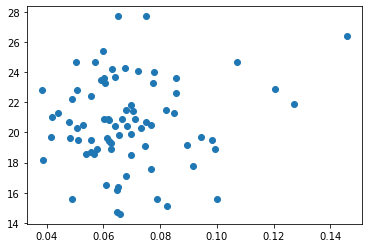

In [17]:
plt.scatter(table['tsRatio'], table['Depression Rate'])

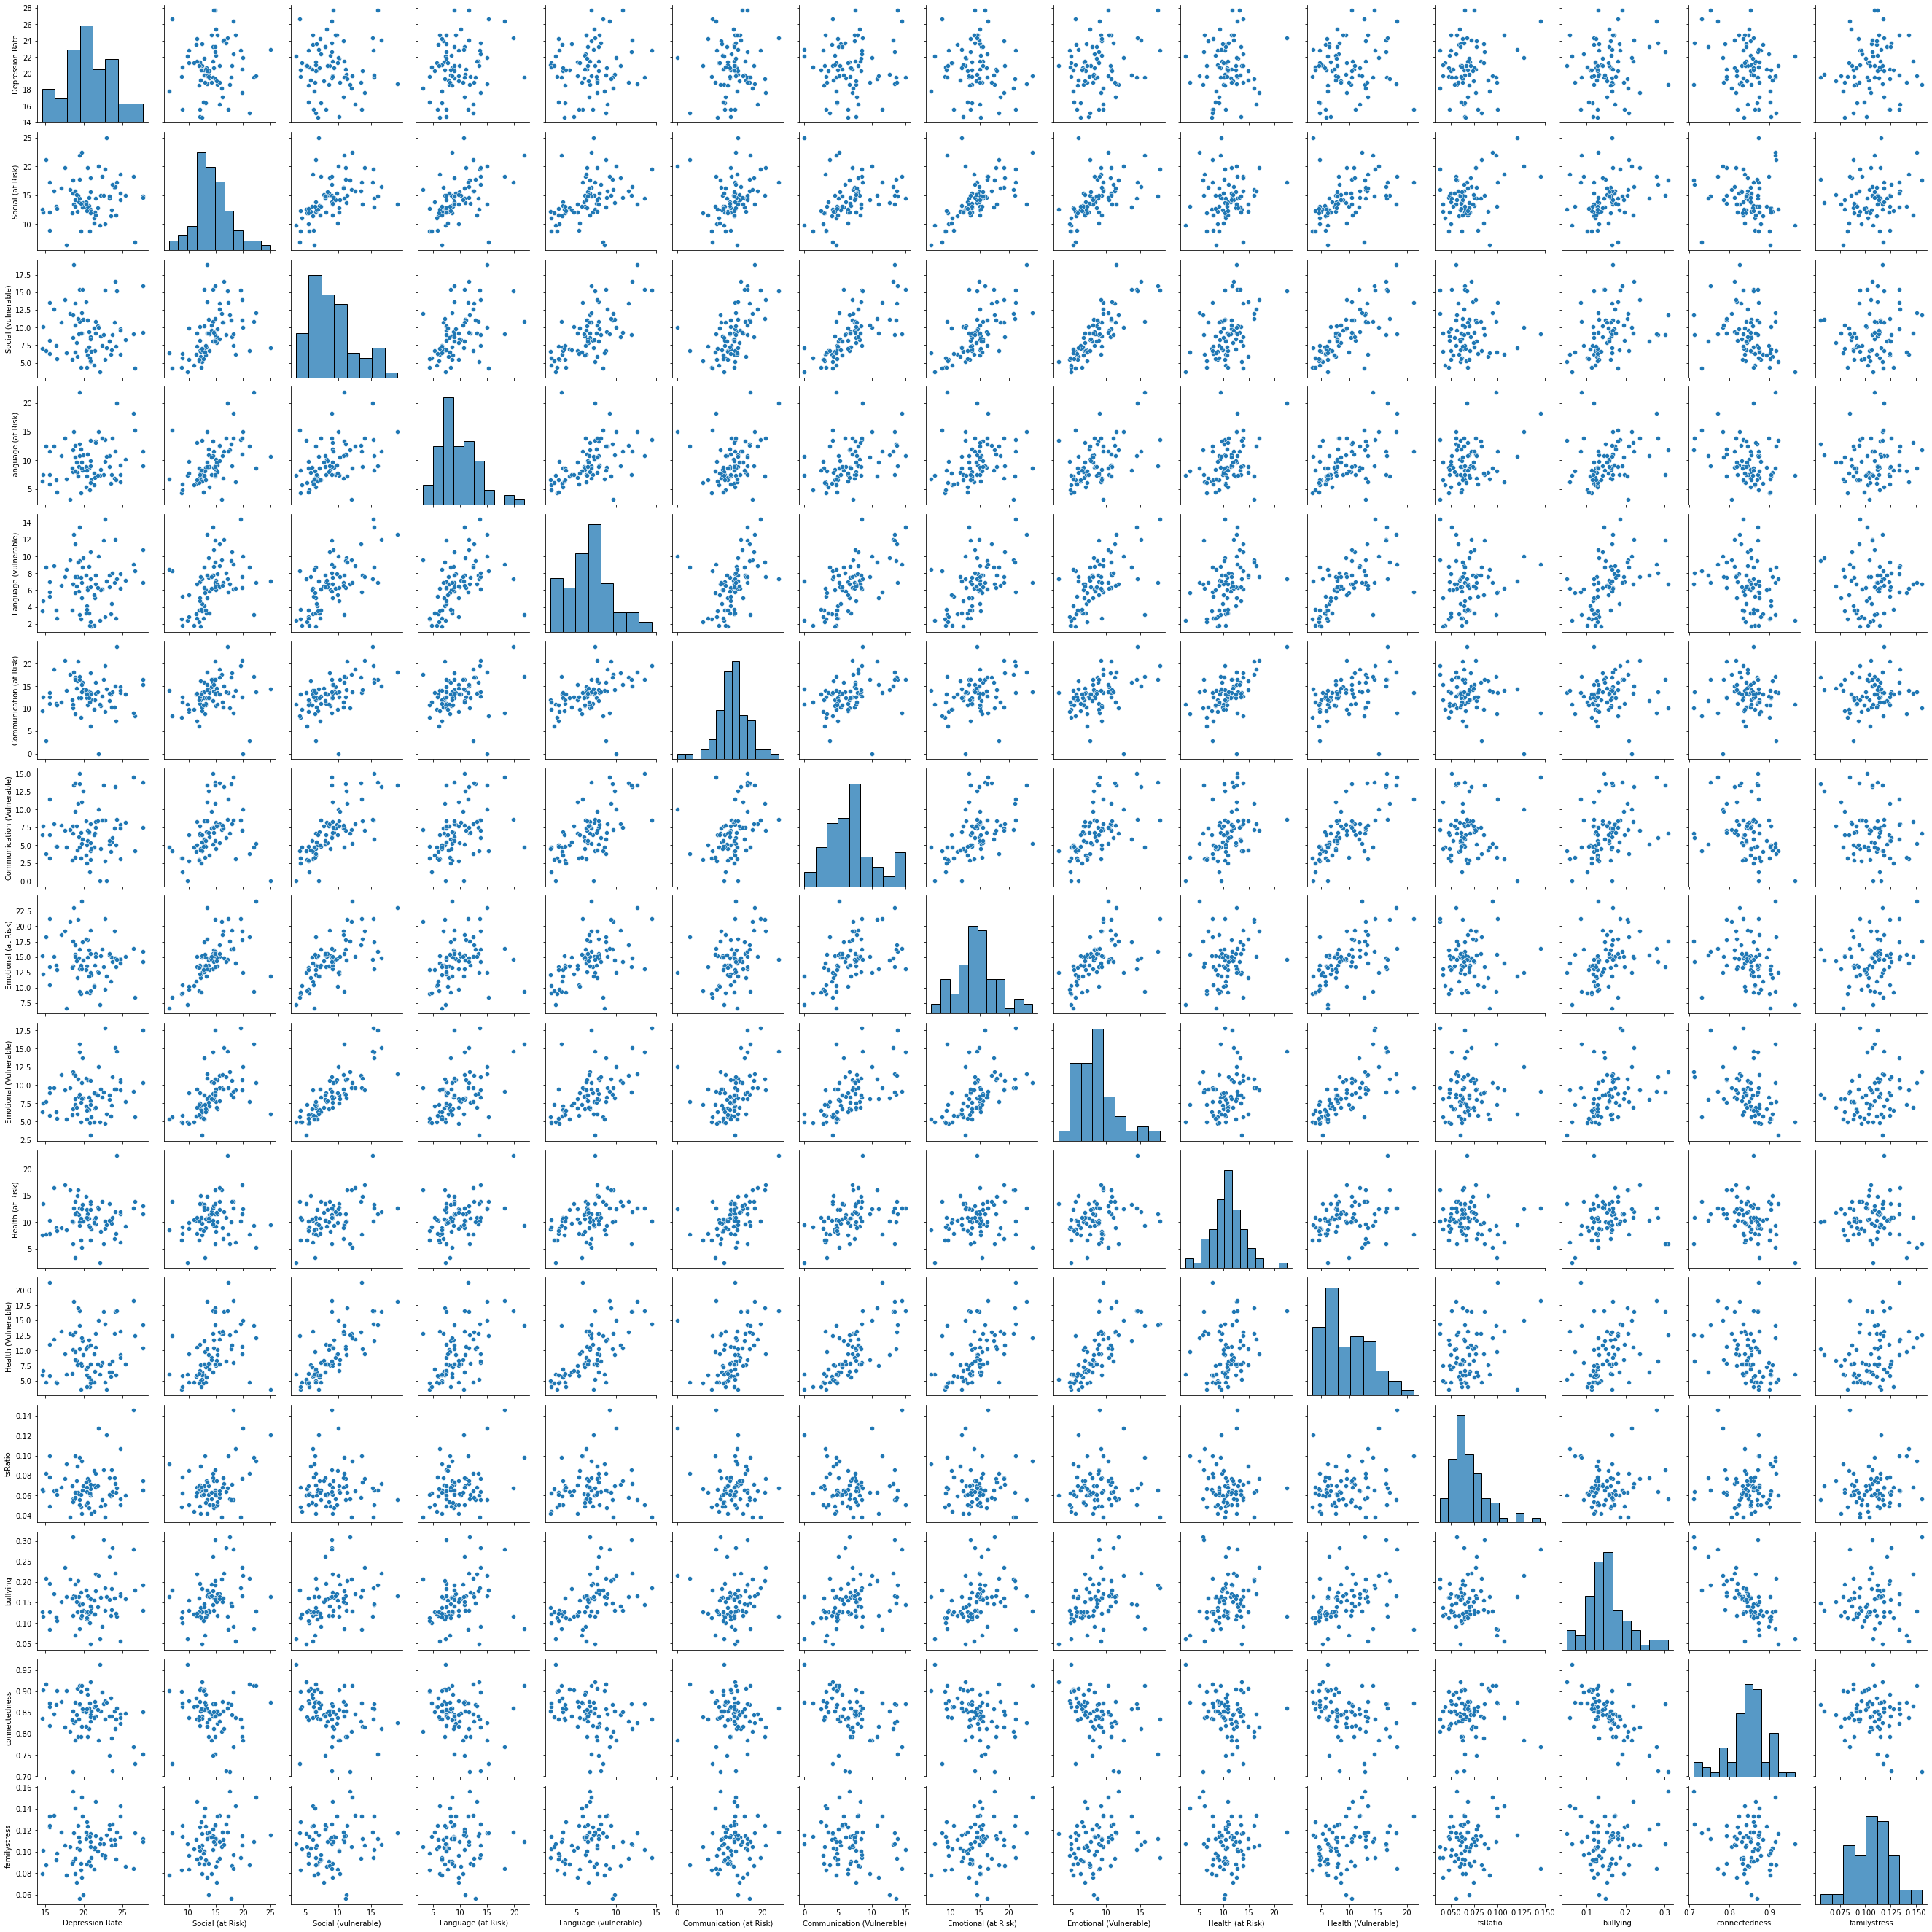

In [18]:
sns.pairplot(table)

In [22]:
vic = gpd.read_file('./VIC_LGA_POLYGON_SHP.shp')

In [27]:
depression.index = depression.index.str.upper()

In [28]:
depression

,Depression Rate
LGA,
ALPINE,18.2
ARARAT,22.8
BALLARAT,15.6
BANYULE,23.5
BASS COAST,22.4
...,...
WODONGA,23.7
WYNDHAM,18.9
YARRA,21.3


In [39]:
depression['Depression Rate'] = depression['Depression Rate'] /100

In [40]:
for_plotting = vic.merge(depression, left_on = 'ABB_NAME', right_on = 'LGA')

<Figure size 1440x1440 with 0 Axes>

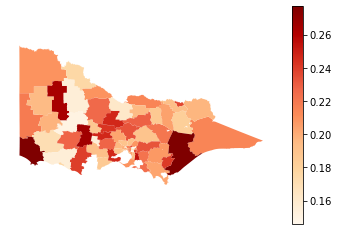

In [61]:
plt.figure(figsize = (20,20))
for_plotting.plot(column = 'Depression Rate', legend=True,cmap='OrRd')
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.savefig('./plots/depressionMap')

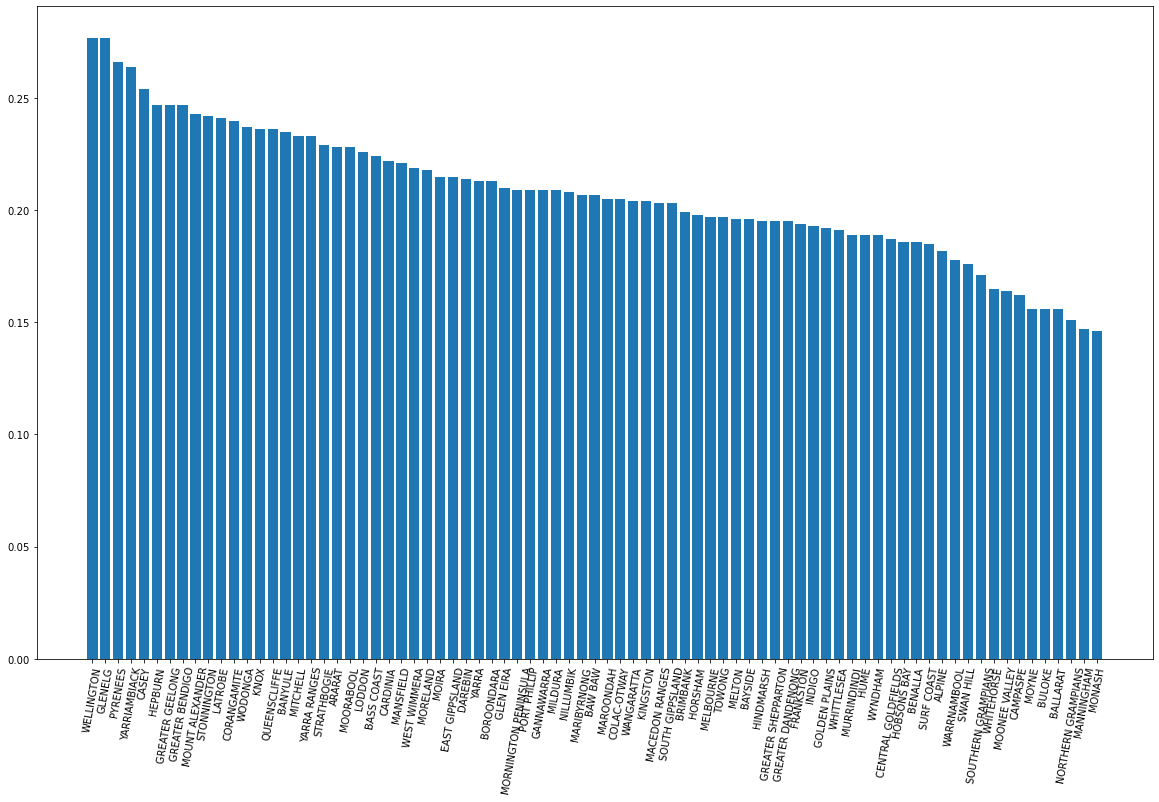

In [55]:
plt.figure(figsize=(20,12))
depression = depression.sort_values(by = 'Depression Rate', ascending=False)
plt.bar(depression.index, depression['Depression Rate'])
plt.xticks(np.arange(len(depression.index)), depression.index, rotation = 80)
plt.show()

In [4]:
behavourial = vcamsLGA('behavourial', 2015)

In [5]:
plotting = depression.join(behavourial)

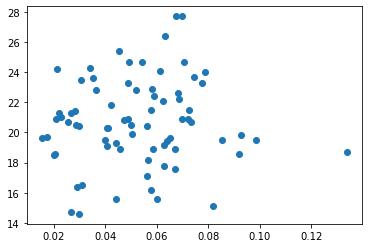

In [6]:
plt.scatter(plotting['behavourial'], plotting['Depression Rate'])

In [ ]:
df.